# Food Claims Process Case Study

### Company Background
The company was a fast food chain in Brazil with over 200 outlets. As with many fast food
establishments, customers make claims against the company. 

For example, they blame the fast food chain for suspected food poisoning.

The legal team, who processes these claims, is currently split across four locations. 

In this notebook we see if there are differences in the time it takes to close
claims across the locations.

## Customer Questions:

### 1. How does the number of claims differ across locations?

### 2. What is the distribution of time to close claims?

### 3. How does the average time to close claims differ by location?


## The Dataset

**The dataset contains one row for each claim.**

|Column Name|Criteria|
|---|---|
|**Claim ID**|**Character**, the unique identifier of the claim.|
|**Time to Close**|**Numeric**, number of days it took for the claim to be closed.|
|**Claim Amount**|**Numeric**, initial claim value in the currency of Brazil. For example, “R$50,000.00” should be converted into 50000.|
|**Amount Paid**|**Numeric**, total amount paid after the claim closed in the currency of Brazil.|
|**Location**|**Character**, location of the claim, one of “RECIFE”, “SAO LUIS”, “FORTALEZA”, or “NATAL”.|
|**Individuals on Claim**|**Numeric**, number of individuals on this claim.|
|**Linked Cases**|**Binary/Boolean**, whether this claim is believed to be linked with other cases, either TRUE or FALSE.|
|**Cause**|**Character**, the cause of the food poisoning injuries, one of ‘vegetable’, ‘meat’, or ‘unknown’. Replace any empty rows with ‘unknown’|



### Data Validation Summary:
After the data was loaded, we used methods to get an overview of the the columns, types of values within those columns, the number of null values (missing data) in those columns (if any) as well as some standard statistics to get a numerical idea of the data.

Two columns needed cleaning to ensure that they could be used later on in the analysis. 

The values in the column "Claim Amount" were stored as strings with leading "R$" to mean Brazilian Real. These values were changed to float numbers and the leading currency denominations were removed.

The second column that needed to be changed was the "Cause" column which had NaN values where the cause of the claim was unknown. These values were changed to the string "unknown" so that it was clearer what was being implied by a missing value as well as allow data visualization of the column further in the analysis if necessary. 

In [111]:
# import required packages
import numpy as np
import pandas as pd
import seaborn as sns

In [112]:
claims = pd.read_csv('claims.csv') # Load in the csv into a dataframe: claims
claims.info() # Overview of number of columns, column names, rows, null values, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [113]:
claims.describe() # Numerical overview of the data with standard statistics i.e mean, std etc

,Time to Close,Amount Paid,Individuals on Claim
count,98.000000,98.000000,98.000000
mean,832.346939,58448.238571,4.908163
std,686.851131,87525.873849,7.292259
min,-57.000000,999.680000,0.000000
25%,340.750000,15965.642500,1.000000
50%,638.500000,29451.040000,2.000000
75%,1138.750000,52114.760000,5.750000
max,3591.000000,558725.770000,41.000000


In [114]:
claims.head() #Look at the first 5 rows of the dataframe

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


N.B. *Claim Amount has string values, this needs to be changed to allow for analysis and visualization.*

In [115]:
# change claim amount to float
claims['Claim Amount'] = claims['Claim Amount'].str.replace("R\$|,", '', regex=True) #remove leading R$
claims.head() # take a look at the first five rows to check

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.00,34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,180000.00,56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,70000.00,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104.00,29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,29000.00,12610.50,FORTALEZA,1,False,meat


In [116]:
claims["Claim Amount"] = claims['Claim Amount'].astype(float) #coerce to float values
claims.dtypes # check if type has changed to float

Claim ID                 object
Time to Close             int64
Claim Amount            float64
Amount Paid             float64
Location                 object
Individuals on Claim      int64
Linked Cases               bool
Cause                    object
dtype: object

In [117]:
claims.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.0,34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,180000.0,56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,70000.0,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104.0,29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,29000.0,12610.50,FORTALEZA,1,False,meat


In [118]:
claims['Cause'][claims['Cause'].isnull()] = 'unknown' # change nan values in Cause column to 'unknown'

In [119]:
claims.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.0,34297.47,RECIFE,2,False,unknown
1,0000000-00.2011.0.00.0086,3591,180000.0,56383.54,SAO LUIS,7,False,unknown
2,0000000-00.2012.0.00.0092,2997,70000.0,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104.0,29217.16,FORTALEZA,4,False,unknown
4,0000000-00.2014.0.00.0097,117,29000.0,12610.50,FORTALEZA,1,False,meat


### Data Discovery and Visualization

### 1. How does the number of claims differ across locations?

The first plot and the accompanying series show how the number of claims differs by location. Sao Luis has the highest number of claims at 30, followed by Recife at 25, Fortaleza at 22, and lastly Natal with 21 claims. This could be due to various reasons which the customer could look into such as demographics of the location and restaurant staff and operations of that location.

<AxesSubplot:xlabel='Location', ylabel='count'>

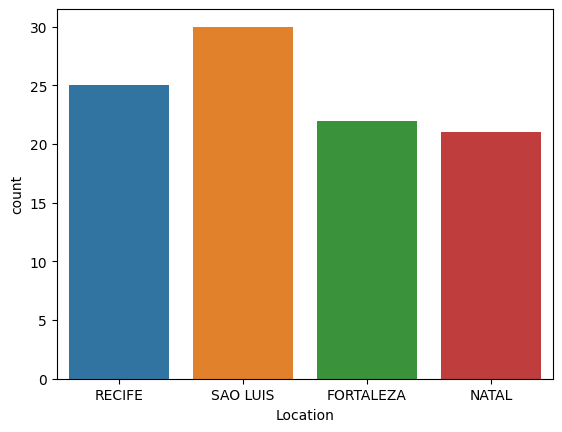

In [120]:
sns.countplot(claims['Location'])

In [121]:
claims.groupby(['Location']).size().sort_values(ascending=False)

Location
SAO LUIS     30
RECIFE       25
FORTALEZA    22
NATAL        21
dtype: int64

### 2. What is the distribution of time to close claims?

The second plot and table show the distribution of the days it took to close the claim. The distribution is heavily right skewed which means most claims were resolved quickly, relatively speaking. 75% were closed within 1138 days where the mean number of days to close were 832. The maximum recorded days to close was 3,591 days which occured in Sao Luis

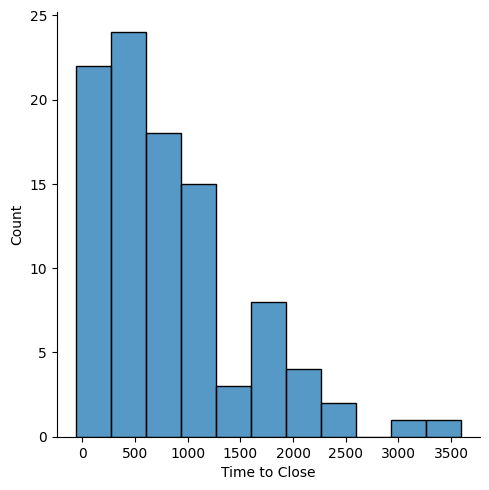

In [122]:
sns.displot(data=claims, x="Time to Close")

In [123]:
claims["Time to Close"].describe()

count      98.000000
mean      832.346939
std       686.851131
min       -57.000000
25%       340.750000
50%       638.500000
75%      1138.750000
max      3591.000000
Name: Time to Close, dtype: float64

In [124]:
claims['Location'][claims["Time to Close"] == max(claims["Time to Close"])]

1    SAO LUIS
Name: Location, dtype: object

### 3. How does the average time to close claims differ by location?

The third plot is a box plot showing us the average time it took for a claim to be closed by location, as well as the typical quantiles (25%, 75%), the spread, and any outliers. Similar to the number of claims per region, this plot shows us that the claims in Sao Luis took the most time to close (1026 days), on average, followed by Recife (860 days), Fortaleza (775 days) and Natal (581 days). This could be due to the fact that as the number of claims in a particular region increase so does the work load on the team operating in that region.

<AxesSubplot:xlabel='Time to Close', ylabel='Location'>

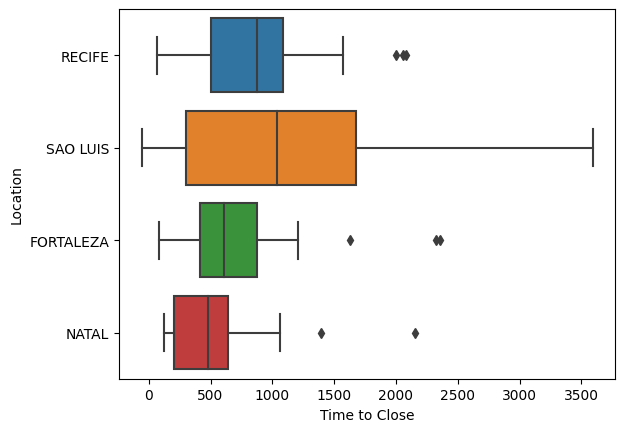

In [125]:
sns.boxplot(data=claims, x="Time to Close", y="Location")

In [126]:
pd.pivot_table(claims, values='Time to Close', index='Location', aggfunc=[np.mean, max, min, sum]).sort_values(('mean', 'Time to Close'), ascending=False)

,mean,max,min,sum
,Time to Close,Time to Close,Time to Close,Time to Close
Location,,,,
SAO LUIS,1026.266667,3591,-57,30788
RECIFE,860.680000,2082,65,21517
FORTALEZA,775.500000,2354,86,17061
NATAL,581.142857,2153,120,12204


### 4. How does the amount paid to settle a claim differ by location?

The fourth plot shows the average amount paid per claim grouped by location. The average amount paid was highest in Natal at 88,489 Brazilian Real and lowest in Fortaleza at 39,592 Brazilian Real. The total amount paid was highest in Natal, even though it had the least number of claims. This amount totalled 1,858,284.22 Brazilian Real followed closely by Sao Luis with 1,839,448.84 Brazilian Real in total amount paid.

<AxesSubplot:xlabel='Amount Paid', ylabel='Location'>

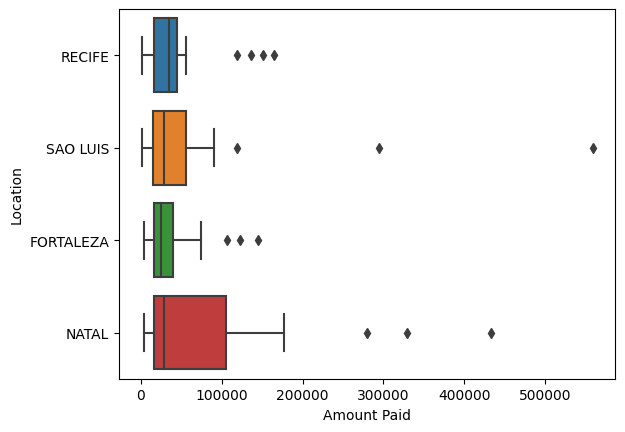

In [127]:
sns.boxplot(data=claims, x="Amount Paid", y="Location")

In [128]:
pd.pivot_table(claims, values='Amount Paid', index='Location', aggfunc=[np.mean, max, min, sum]).sort_values(('mean', 'Amount Paid'), ascending=False)

,mean,max,min,sum
,Amount Paid,Amount Paid,Amount Paid,Amount Paid
Location,,,,
NATAL,88489.724762,433320.46,4302.24,1858284.22
SAO LUIS,61314.961333,558725.77,999.68,1839448.84
RECIFE,46366.108000,164058.23,1013.36,1159152.70
FORTALEZA,39592.800909,144665.72,4154.22,871041.62


Lastly we have a data visualization to demonstrate the characteristics of four different variables in the claims dataset (***Time to Close, Claim Amount, Amount Paid and Individuals on Claim***) and one data visualization to demonstrate the relationship between Time to Close and Claim Amount colored by Location.

array([[<AxesSubplot:title={'center':'Time to Close'}>,
        <AxesSubplot:title={'center':'Claim Amount'}>],
       [<AxesSubplot:title={'center':'Amount Paid'}>,
        <AxesSubplot:title={'center':'Individuals on Claim'}>]],
      dtype=object)

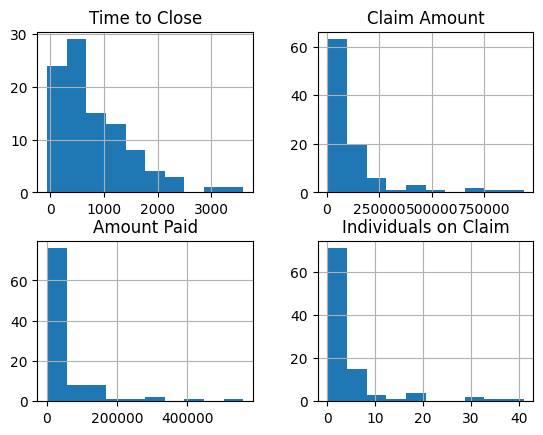

In [129]:
claims.hist()

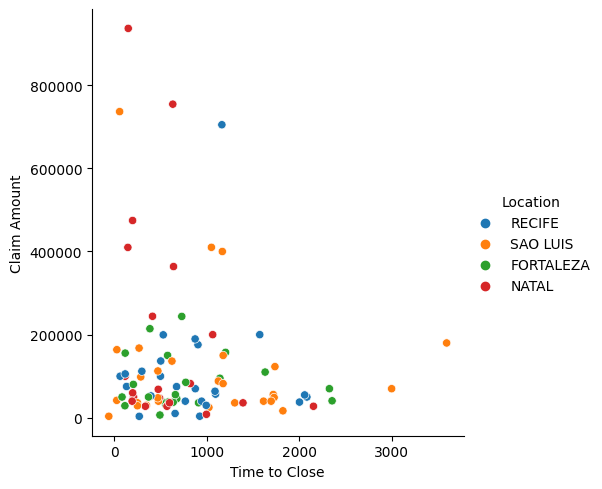

In [130]:
sns.relplot(data=claims, x="Time to Close", y="Claim Amount", hue="Location")

One interesting data point in the plot above is the highest claimed amount in Natal which was over 800,000 Brazilian Real. This claim was one of the quickest claims to be closed.

Also this plot shows that there is almost no correlation between Time to Close and Claim Amount.